# 1- Importation des librairies et du dataset

In [137]:
#importer les librairies
import pandas as pd
import numpy as np
import matplotlib as plt
#from sklearn.model_selection import train_test_split

In [138]:
#df = pd.read_csv('credit.csv', ";")
#df.head()
#df.shape

In [139]:
#train, test = train_test_split(df, test_size = 0.2, random_state = 40 )

In [140]:
#train
#train.to_csv('train.csv', index = False)

In [141]:
#test
#test.to_csv('test.csv', index = False)

# 2- Importation du dataset train, dictionnaire valeurs manquante, 

In [142]:
#impoter le dataset train en créant un dictionnaire de valeurs manquantes
missing_values = ["n/a", "na", "--","NaN","nan","N/A"]
train = pd.read_csv('train.csv', na_values = missing_values)
train.set_index('id',inplace=True)

# 3- Visualisation du head

In [143]:
#afficher les 3 premieres lignes du train
train.head(3)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,sex,status_matrimonial,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
id,,,,,,,,,,,,,,,,,,,,,
30,<0,24,existing paid,furniture/equipment,7721,no known savings,<1,1,female,div/dep/mar,...,life insurance,30,none,own,1,skilled,1,yes,no,good
536,<0,36,critical/other existing credit,furniture/equipment,5371,<100,1<=X<4,3,male,single,...,life insurance,28,none,own,2,skilled,1,none,yes,good
696,0<=X<200,7,existing paid,radio/tv,2576,<100,1<=X<4,2,male,single,...,real estate,35,none,own,1,skilled,1,none,yes,good


In [144]:
train['class'].value_counts()

good    553
bad     247
Name: class, dtype: int64

# 4- Split du dataset en cat et num et affichage des nouveaux dataframes créés

Ici, on fait un split à la main des variables catégorielles et numériques. Après avoir obtenu les deux listes cat et num, on fait de ces listes des nouvelles dataframes qu'on utilisera plus tard

In [99]:
#liste des variables catégorielles et numériques
#création de deux nouveaux dataframe cat et num

cat = train[['checking_status','employment','credit_history','purpose','savings_status','sex','status_matrimonial','other_parties','property_magnitude','other_payment_plans','housing','job','own_telephone','foreign_worker','class']]
num = train[['duration','credit_amount','installment_commitment','residence_since','age','existing_credits','num_dependents']]

In [100]:
cat

,checking_status,employment,credit_history,purpose,savings_status,sex,status_matrimonial,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
id,,,,,,,,,,,,,,,
30,<0,<1,existing paid,furniture/equipment,no known savings,female,div/dep/mar,none,life insurance,none,own,skilled,yes,no,good
536,<0,1<=X<4,critical/other existing credit,furniture/equipment,<100,male,single,guarantor,life insurance,none,own,skilled,none,yes,good
696,0<=X<200,1<=X<4,existing paid,radio/tv,<100,male,single,guarantor,real estate,none,own,skilled,none,yes,good
558,0<=X<200,>=7,critical/other existing credit,new car,<100,male,single,none,car,bank,own,skilled,yes,yes,bad
837,no checking,1<=X<4,critical/other existing credit,radio/tv,<100,male,single,none,car,none,own,skilled,none,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,<0,4<=X<7,existing paid,furniture/equipment,<100,female,div/dep/mar,none,real estate,none,rent,skilled,none,yes,bad
271,<0,<1,existing paid,radio/tv,<100,female,div/dep/mar,none,real estate,none,own,skilled,yes,yes,bad
861,<0,<1,critical/other existing credit,business,<100,male,single,none,life insurance,bank,own,unskilled resident,none,yes,good


In [101]:
num

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
id,,,,,,,
30,24,7721,1,2,30,1,1
536,36,5371,3,2,28,2,1
696,7,2576,2,2,35,1,1
558,18,884,4,4,36,1,2
837,18,1800,4,2,24,2,1
...,...,...,...,...,...,...,...
107,30,2406,4,4,23,1,1
271,24,2439,4,4,35,1,1
861,13,1797,3,1,28,2,1


# 5- Visualisation des valeurs manquantes dans cat puis dans num 

Dans un premier temps nous visualisera s'il y a des valeurs manquantes dans le cat et le num, c'est variables manquantes sont généralement détectées par NaN.

Visualisons les

In [102]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 30 to 103
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   checking_status      800 non-null    object
 1   employment           800 non-null    object
 2   credit_history       800 non-null    object
 3   purpose              800 non-null    object
 4   savings_status       800 non-null    object
 5   sex                  800 non-null    object
 6   status_matrimonial   800 non-null    object
 7   other_parties        800 non-null    object
 8   property_magnitude   800 non-null    object
 9   other_payment_plans  800 non-null    object
 10  housing              800 non-null    object
 11  job                  800 non-null    object
 12  own_telephone        800 non-null    object
 13  foreign_worker       800 non-null    object
 14  class                800 non-null    object
dtypes: object(15)
memory usage: 100.0+ KB


In [103]:
num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 30 to 103
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   duration                800 non-null    int64
 1   credit_amount           800 non-null    int64
 2   installment_commitment  800 non-null    int64
 3   residence_since         800 non-null    int64
 4   age                     800 non-null    int64
 5   existing_credits        800 non-null    int64
 6   num_dependents          800 non-null    int64
dtypes: int64(7)
memory usage: 50.0 KB


<h3>Etant donne que dans notre dataset nous n'avons pas de valeurs manquantes,cela n'empêche pas que nous devons mettre en place une strategie au cas ou on rencontrerait un cas pareil plus tard</h3>

# 6- Imputation des variables manquantes numériques

Ici on va remplacer les variables manquantes par la mediane de la colonne ou se trouve cette valeur manquante

In [104]:
#imputation variables numériques

num['duration'].fillna((num['duration'].median()), inplace = True)
num['credit_amount'].dropna(inplace = True)
num['installment_commitment'].fillna((num['installment_commitment'].mean()), inplace = True)
num['residence_since'].fillna((num['residence_since'].median()), inplace = True)
num['age'].fillna((num['age'].median()), inplace = True)
num['existing_credits'].fillna((num['existing_credits'].median()), inplace = True)
num['num_dependents'].fillna((num['num_dependents'].median()), inplace = True)



C:\Users\HP\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


# 7- Imputation des variables manquantes catégorielles

Ici, on va remplacer le variable catégorielle manquante par la variable qui apparait le plus dans la colonne contenant la variable manquante.

Les types de variables manquantes prises en compte sont lister dans la bibliothèque créée "missing_values" présente dans le 2- 

In [105]:
#imputation variables catégorielles
cat['credit_history'].fillna((cat['credit_history'].mode()), inplace =True)
cat['checking_status'].fillna((cat['checking_status'].mode()), inplace =True)
cat['employment'].fillna((cat['employment'].mode()), inplace =True)
cat['purpose'].fillna((cat['purpose'].mode()), inplace =True)
cat['savings_status'].fillna((cat['savings_status'].mode()), inplace =True)
cat['sex'].fillna((cat['sex'].mode()), inplace =True)
cat['status_matrimonial'].fillna((cat['status_matrimonial'].mode()), inplace =True)
cat['other_parties'].fillna((cat['other_parties'].mode()), inplace =True)
cat['property_magnitude'].fillna((cat['property_magnitude'].mode()), inplace =True)
cat['other_payment_plans'].fillna((cat['other_payment_plans'].mode()), inplace =True)
cat['housing'].fillna((cat['housing'].mode()), inplace =True)
cat['job'].fillna((cat['job'].mode()), inplace =True)
cat['own_telephone'].fillna((cat['own_telephone'].mode()), inplace =True)
cat['foreign_worker'].fillna((cat['foreign_worker'].mode()), inplace =True)



# 8- Détection des valeurs aberrantes(outliers)


Pour visualiser les valeurs aberrantes plus facilement, nous allons utiliser les boxplot.
Sur les boxplot, les valeurs qui sont tellement eloignées des autres valeurs du même domaine sont appelées valeurs aberrantes.

Sans tarder observons ces valeurs aberrantes

<AxesSubplot:>

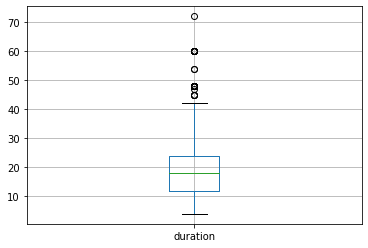

In [106]:
num.boxplot(column='duration')

<AxesSubplot:>

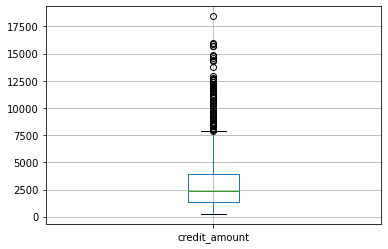

In [107]:
num.boxplot(column='credit_amount')

<AxesSubplot:>

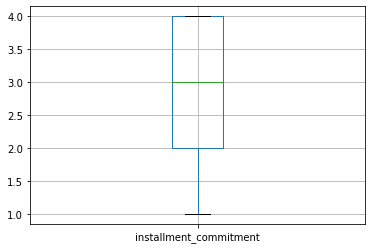

In [108]:
num.boxplot(column='installment_commitment')

<AxesSubplot:>

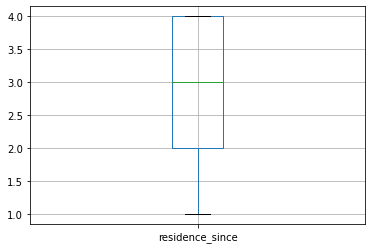

In [109]:
num.boxplot(column='residence_since')

<AxesSubplot:>

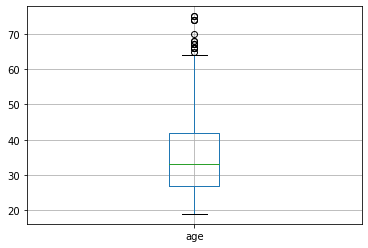

In [110]:
num.boxplot(column='age')

<AxesSubplot:>

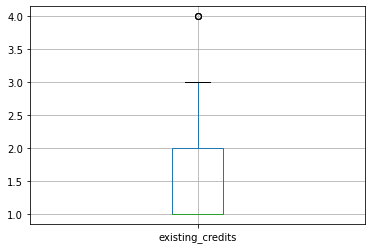

In [111]:
num.boxplot(column='existing_credits')

<AxesSubplot:>

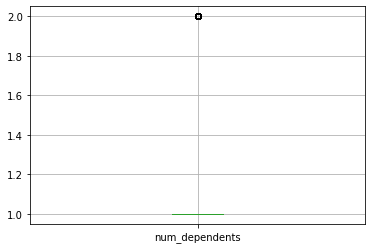

In [112]:
num.boxplot(column='num_dependents')

<h3> Après la visualisation des valeurs aberrantes de chaques variables numériques, nous devons étudier la necessité de traiter ces valeurs aberrantes </h3>

- Nous allons traiter la variable 'age'.

- Nous n'allons pas traiter les valeurs éloignées présentées par le boxplot de 'credit_amount'comme aberrantes car il s'agit ici d'une variable très importante et la supprimer ou la remplacer fausserais le modèle lors de l'apprentissage

- Nous n'allons pas traiter les valeurs présentées dans existing_credits comme aberrantes car nous n'avons qu'une très petite quantité de valeurs aberrantes présentes donc elles ne pourront pas impacter significativement le modèle

- Nous allons traiter les valeurs présentées dans "duration" comme aberrante

- Les autres variables illustrées dans les boxplot plus haut ne seront pas traitées car elles ne comportent pas de valeurs aberrantes

# 9- Traitement des valeurs aberrantes

Ici nous allons traiter les valeurs aberrantes de la variable 'age', 'duration', 'credit_amount' en les supprimant grâce à l'écart IQR


In [113]:
#On supprime les valeurs aberrantes pour la colonne âge

#On calcule Q1

q1=num["age"].quantile(q=0.25)

#On calcule Q3

q3=num["age"].quantile(q=0.75)

#On calcule l'écart interquartile (IQR)

IQR=q3-q1

#On calcule la borne inférieure à l'aide du Q1 et de l'écart interquartile

borne_inf = q1-1.5*IQR

#On calcule la borne supérieure à l'aide du Q3 et de l'écart interquartile

borne_sup = q3 +1.5*IQR

#On garde les valeurs à l'intérieur de la borne inférieure et supérieure

num= num[num["age"]<borne_sup]
num=num[num["age"]>borne_inf]

<AxesSubplot:>

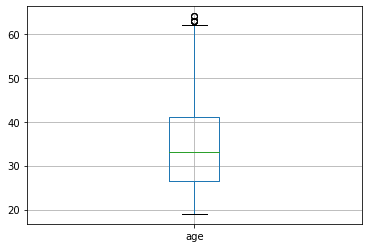

In [114]:
num.boxplot(column='age')

In [115]:
#On supprime les valeurs aberrantes pour la colonne duration

#On calcule Q1

q1=num["duration"].quantile(q=0.25)

#On calcule Q3

q3=num["duration"].quantile(q=0.75)

#On calcule l'écart interquartile (IQR)

IQR=q3-q1

#On calcule la borne inférieure à l'aide du Q1 et de l'écart interquartile

borne_inf = q1-1.5*IQR

#On calcule la borne supérieure à l'aide du Q3 et de l'écart interquartile

borne_sup = q3 +1.5*IQR

#On garde les valeurs à l'intérieur de la borne inférieure et supérieure

num= num[num["duration"]<borne_sup]
num=num[num["duration"]>borne_inf]

<AxesSubplot:>

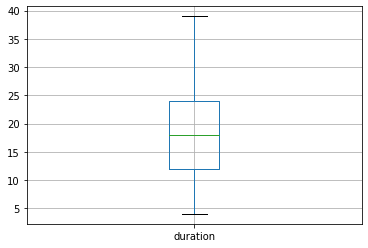

In [116]:
num.boxplot(column='duration')

In [117]:
#On supprime les valeurs aberrantes pour la colonne credit_amount

#On calcule Q1

#q1=num["credit_amount"].quantile(q=0.25)

#On calcule Q3

#q3=num["credit_amount"].quantile(q=0.75)

#On calcule l'écart interquartile (IQR)

#IQR=q3-q1

#On calcule la borne inférieure à l'aide du Q1 et de l'écart interquartile

#borne_inf = q1-1.5*IQR

#On calcule la borne supérieure à l'aide du Q3 et de l'écart interquartile

#borne_sup = q3 +1.5*IQR

#On garde les valeurs à l'intérieur de la borne inférieure et supérieure

#num= num[num["credit_amount"]<borne_sup]
#num=num[num["credit_amount"]>borne_inf]

In [118]:
#num.boxplot(column='credit_amount')

In [119]:
num.shape

(718, 7)

<h3>
    Après avoir supprimé les valeurs aberrantes numériques, nous nous rendons compte que notre dataset a diminué en valeurs, il est quitté de 900 lignes à 807 lignes. Et ainsi nous pouvons passer à l'étape suivante qui consiste à mettre les variables numériques à la même échelle (normalisation ou standardisation des données)
</h3>

# 10- Verification de la normalité des données et choix de l'approche


Avant de choisir l'une des deux approches, nous devons d'abord vérifier la normalité des données. Car, pour des données suivant une loi normale, on applique la normalisation et au cas contraire c'est la standardisation qui est à utiliser.
Pour la vérification, observons les différents histogrammes et analysons pour tirer une conclusion.

In [120]:
num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 30 to 103
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   duration                718 non-null    int64
 1   credit_amount           718 non-null    int64
 2   installment_commitment  718 non-null    int64
 3   residence_since         718 non-null    int64
 4   age                     718 non-null    int64
 5   existing_credits        718 non-null    int64
 6   num_dependents          718 non-null    int64
dtypes: int64(7)
memory usage: 44.9 KB


<h3>Grâce à pandas-profiling nous pouvons visualiser les différents histogrammes pour notre analyse</h3>

In [121]:
#from pandas_profiling import ProfileReport
#prof = ProfileReport(num)
#prof.to_file(output_file='rapport_num.html')

<h3> Après l'analyse des différents histogrammes, nous pouvons dire que ces variables suivent une loie normale et par conséquent on utilisera la standardisation à la place de la normalisation</h3>

# 11- standardisation(score Z) des variables numériques

In [122]:
num

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
id,,,,,,,
30,24,7721,1,2,30,1,1
536,36,5371,3,2,28,2,1
696,7,2576,2,2,35,1,1
558,18,884,4,4,36,1,2
837,18,1800,4,2,24,2,1
...,...,...,...,...,...,...,...
107,30,2406,4,4,23,1,1
271,24,2439,4,4,35,1,1
861,13,1797,3,1,28,2,1


In [123]:
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
#from sklearn.preprocessing import MaxAbsScaler



scaler = RobustScaler().fit(num)
num1 = scaler.transform(num)
num1 = pd.DataFrame(num1, index=num.index, columns= num.columns)
num = num1


In [124]:
#on affiche le dataframe num
num

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
id,,,,,,,
30,0.500000,2.456805,-1.0,-0.5,-0.133333,0.0,0.0
536,1.500000,1.408985,0.0,-0.5,-0.266667,1.0,0.0
696,-0.916667,0.162747,-0.5,-0.5,0.200000,0.0,0.0
558,0.000000,-0.591684,0.5,0.5,0.266667,0.0,1.0
837,0.000000,-0.183257,0.5,-0.5,-0.533333,1.0,0.0
...,...,...,...,...,...,...,...
107,1.000000,0.086947,0.5,0.5,-0.600000,0.0,0.0
271,0.500000,0.101661,0.5,0.5,0.200000,0.0,0.0
861,-0.416667,-0.184595,0.0,-1.0,-0.266667,1.0,0.0


<h3> Après avoir fini le cleaning des variables numériques, avec le traitement des valeurs manquantes, aberrantes, la normalisation nous pouvons nous interesser plus en profondeur aux variables catégorielles </h3>

# 12- Encodage des variables catégorielles


Pour encoder les variables catégorielles, nous disposons de nombreuses méthodes et techniques d'encodage à savoir:

- Label Encoding or Ordinal Encoding pour les variables ayant un ordre d'importance aussi appelé variables ordinales
- One hot Encoding ici c'est pour les variables nominales

- Effect Encoding permet de representer les données sous formes de -1,0 et 1
- Binary Encoding
- BaseN Encoding
- Hash Encoding
- Target Encoding

Nous allons choisir le One Hot encoding dans certain cas et le Ordinal encoding dans d'autre cas

Nous allons appliquer le OrdinalEncoding pour les variables "checking_status, employment, savings_status, own_telephone, foreign_worker, class" car après analyse, nous pouvons dire que ces variable sont ordinales car elles suivent un ordre de grandeur et d'importance

In [125]:
cat.head()

,checking_status,employment,credit_history,purpose,savings_status,sex,status_matrimonial,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
id,,,,,,,,,,,,,,,
30,<0,<1,existing paid,furniture/equipment,no known savings,female,div/dep/mar,none,life insurance,none,own,skilled,yes,no,good
536,<0,1<=X<4,critical/other existing credit,furniture/equipment,<100,male,single,guarantor,life insurance,none,own,skilled,none,yes,good
696,0<=X<200,1<=X<4,existing paid,radio/tv,<100,male,single,guarantor,real estate,none,own,skilled,none,yes,good
558,0<=X<200,>=7,critical/other existing credit,new car,<100,male,single,none,car,bank,own,skilled,yes,yes,bad
837,no checking,1<=X<4,critical/other existing credit,radio/tv,<100,male,single,none,car,none,own,skilled,none,yes,good


In [126]:
cat.dtypes

checking_status        object
employment             object
credit_history         object
purpose                object
savings_status         object
sex                    object
status_matrimonial     object
other_parties          object
property_magnitude     object
other_payment_plans    object
housing                object
job                    object
own_telephone          object
foreign_worker         object
class                  object
dtype: object

In [127]:
cat = cat.astype('category')

In [128]:
cat.dtypes

checking_status        category
employment             category
credit_history         category
purpose                category
savings_status         category
sex                    category
status_matrimonial     category
other_parties          category
property_magnitude     category
other_payment_plans    category
housing                category
job                    category
own_telephone          category
foreign_worker         category
class                  category
dtype: object

<h3>Encodage des variables ordinales</h3>

Ici pour une meilleure compréhension nous allons faire l'encoding à la main en définissant nos priorités en fonction de notre analyse

In [129]:
cat['own_telephone'].replace({'yes':'1', 'none': '0'}, inplace = True)
cat['foreign_worker'].replace({'yes':'1', 'no': '0'}, inplace = True)
cat['class'].replace({'good':'1', 'bad': '0'}, inplace = True)
cat['other_parties'].replace({'none':'0','co applicant':'1', 'guarantor':'2'}, inplace = True)
cat['employment'].replace ({'unemployed':'0', '<1':'1', '1<=X<4':'2', '4<=X<7':'3', '>=7':'4' }, inplace = True)
cat['savings_status'].replace({'no known savings' :'0', '<100':'1', '100<=X<500':'2', '500<=X<1000':'3', '>=1000':'4' },inplace = True)
cat['sex'].replace({'male': '1','female':'0'}, inplace = True)
cat['checking_status'].replace({"no checking" :0, '<0':'1', '0<=X<200':'2', '>=200':'3'}, inplace = True)

In [130]:
cat

,checking_status,employment,credit_history,purpose,savings_status,sex,status_matrimonial,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
id,,,,,,,,,,,,,,,
30,1,1,existing paid,furniture/equipment,0,0,div/dep/mar,0,life insurance,none,own,skilled,1,0,1
536,1,2,critical/other existing credit,furniture/equipment,1,1,single,2,life insurance,none,own,skilled,0,1,1
696,2,2,existing paid,radio/tv,1,1,single,2,real estate,none,own,skilled,0,1,1
558,2,4,critical/other existing credit,new car,1,1,single,0,car,bank,own,skilled,1,1,0
837,0,2,critical/other existing credit,radio/tv,1,1,single,0,car,none,own,skilled,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,1,3,existing paid,furniture/equipment,1,0,div/dep/mar,0,real estate,none,rent,skilled,0,1,0
271,1,1,existing paid,radio/tv,1,0,div/dep/mar,0,real estate,none,own,skilled,1,1,0
861,1,1,critical/other existing credit,business,1,1,single,0,life insurance,bank,own,unskilled resident,0,1,1


<h3>Encodage des variables Nominales</h3>

Après avoir encodé les variables ordinales, nous pouvons passer aux variables nominales.

Pour l'encodage de ces variables, nous allons utiliser le OneHotEncoder ou encodage à chaud.

Comme variables ordinales, nous avons : credit_history, purpose, status_matrimonial, property_magnitude, other_payment_plans, housing et job

In [131]:
cat = pd.get_dummies (cat, columns = ['credit_history', 'purpose', 'status_matrimonial', 'property_magnitude', 'other_payment_plans', 'housing', 'job'])

In [132]:
cat

,checking_status,employment,savings_status,sex,other_parties,own_telephone,foreign_worker,class,credit_history_all paid,credit_history_critical/other existing credit,...,other_payment_plans_bank,other_payment_plans_none,other_payment_plans_stores,housing_for free,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident
id,,,,,,,,,,,,,,,,,,,,,
30,1,1,0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
536,1,2,1,1,2,0,1,1,0,1,...,0,1,0,0,1,0,0,1,0,0
696,2,2,1,1,2,0,1,1,0,0,...,0,1,0,0,1,0,0,1,0,0
558,2,4,1,1,0,1,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0
837,0,2,1,1,0,0,1,1,0,1,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,1,3,1,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
271,1,1,1,0,0,1,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
861,1,1,1,1,0,0,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1


In [133]:
num

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
id,,,,,,,
30,0.500000,2.456805,-1.0,-0.5,-0.133333,0.0,0.0
536,1.500000,1.408985,0.0,-0.5,-0.266667,1.0,0.0
696,-0.916667,0.162747,-0.5,-0.5,0.200000,0.0,0.0
558,0.000000,-0.591684,0.5,0.5,0.266667,0.0,1.0
837,0.000000,-0.183257,0.5,-0.5,-0.533333,1.0,0.0
...,...,...,...,...,...,...,...
107,1.000000,0.086947,0.5,0.5,-0.600000,0.0,0.0
271,0.500000,0.101661,0.5,0.5,0.200000,0.0,0.0
861,-0.416667,-0.184595,0.0,-1.0,-0.266667,1.0,0.0


Après avoir fait l'encoding de toutes les variables, nous devont maintenant associer les dataframe cat et num en un unique dataframe final. 
Les deux dataframes ont un nombre de lignes différent et il faudra au préalable supprimer les lignes qui sont différentes avant d'appliquer notre merge(). Mais grace à la fonction merge, le processus se fait de façon automatique.

In [134]:
train_final = num.merge(cat, how = 'inner', left_index= True, right_index = True)

In [135]:
train_final

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status,employment,savings_status,...,other_payment_plans_bank,other_payment_plans_none,other_payment_plans_stores,housing_for free,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident
id,,,,,,,,,,,,,,,,,,,,,
30,0.500000,2.456805,-1.0,-0.5,-0.133333,0.0,0.0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
536,1.500000,1.408985,0.0,-0.5,-0.266667,1.0,0.0,1,2,1,...,0,1,0,0,1,0,0,1,0,0
696,-0.916667,0.162747,-0.5,-0.5,0.200000,0.0,0.0,2,2,1,...,0,1,0,0,1,0,0,1,0,0
558,0.000000,-0.591684,0.5,0.5,0.266667,0.0,1.0,2,4,1,...,1,0,0,0,1,0,0,1,0,0
837,0.000000,-0.183257,0.5,-0.5,-0.533333,1.0,0.0,0,2,1,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,1.000000,0.086947,0.5,0.5,-0.600000,0.0,0.0,1,3,1,...,0,1,0,0,0,1,0,1,0,0
271,0.500000,0.101661,0.5,0.5,0.200000,0.0,0.0,1,1,1,...,0,1,0,0,1,0,0,1,0,0
861,-0.416667,-0.184595,0.0,-1.0,-0.266667,1.0,0.0,1,1,1,...,1,0,0,0,1,0,0,0,0,1


In [145]:
train_final['class'].value_counts()

1    513
0    205
Name: class, dtype: int64

In [136]:
train_final.to_csv('train_final.csv')